In [29]:
import sys
sys.path.append('../')
from utils import utils
import numpy as np

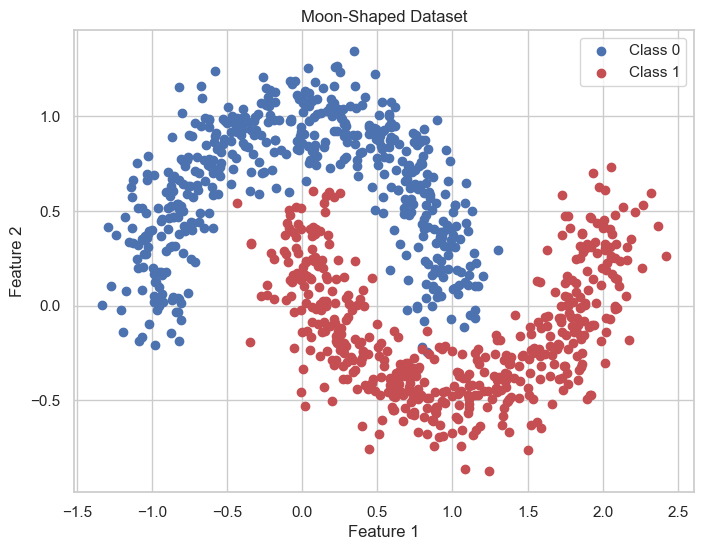

In [30]:
## get data

# Create a moon-shaped dataset with 1000 samples
X, y = utils.make_moons(n_samples=1000, noise=0.15, random_state=42)

# X contains the data points, and y contains their corresponding labels (0 or 1)
utils.plot_moons(X, y)

In [34]:
n_components = 2  # Number of Gaussian components

In [36]:
from scipy.stats import multivariate_normal

data = X

# Initialize parameters
n_samples, n_features = data.shape

# Initialize the parameters for the Gaussian components
means = np.random.rand(n_components, n_features)
covariances = np.array([np.identity(n_features) for _ in range(n_components)])
weights = np.ones(n_components) / n_components

# EM Algorithm
max_iterations = 100
for iteration in range(max_iterations):
    # Expectation step
    responsibilities = np.zeros((n_samples, n_components))
    for k in range(n_components):
        responsibilities[:, k] = weights[k] * multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])

    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # Maximization step
    Nk = responsibilities.sum(axis=0)
    weights = Nk / n_samples
    means = np.dot(responsibilities.T, data) / Nk[:, np.newaxis]
    covariances = [(np.dot(responsibilities[:, k] * (data - means[k]).T, data - means[k]) / Nk[k]).tolist() for k in range(n_components)]

# Generate data from the estimated multivariate Gaussian
estimated_data = np.zeros((n_samples, n_features))
for k in range(n_components):
    estimated_data += responsibilities[:, k][:, np.newaxis] * np.random.multivariate_normal(means[k], covariances[k], size=n_samples)




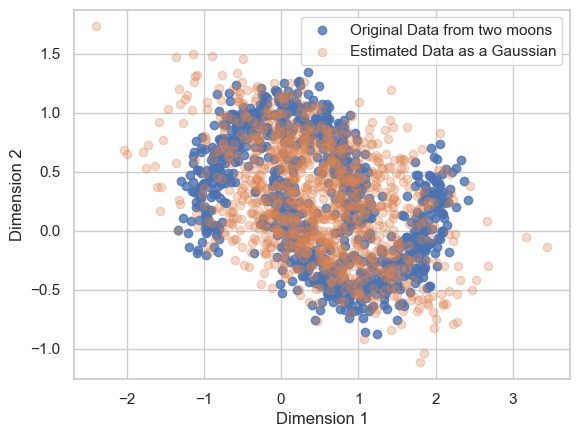

In [37]:
# Plot the original data and estimated data
plt.scatter(data[:, 0], data[:, 1], label="Original Data from two moons", alpha=0.8)
plt.scatter(estimated_data[:, 0], estimated_data[:, 1], label="Estimated Data as a Gaussian", alpha=0.3)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


In [39]:
## MMD between real and estimated data
import torch

result = utils.MMD(torch.tensor(X), torch.tensor(estimated_data), kernel="multiscale")

print(f"MMD result of X and Y is {result.item()}")

MMD result of X and Y is 0.060326479375362396
